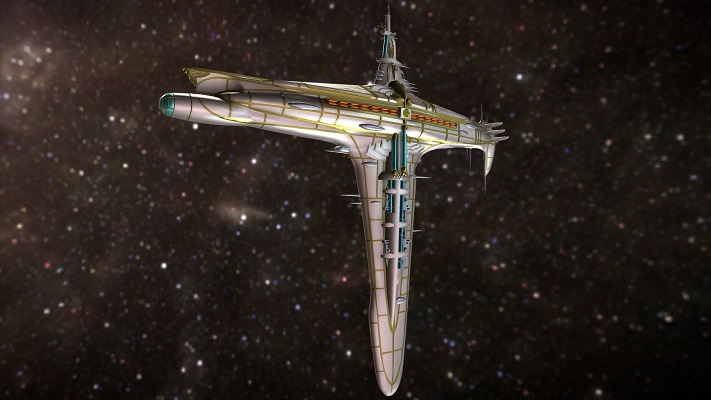

## Let's Start with import data and some important libraries...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [ ]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Let's look at the data

In [ ]:
train=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
print(train.shape)
train.head()

In [ ]:
test.head()

## Looking at unique values.

In [ ]:
train.nunique().sort_values(ascending=False)

## Percentage of Null values in each column

In [ ]:
round(train.isnull().sum()*100/len(train),2).sort_values(ascending=False)

## Splet result and Lets drop some unimportant columns Data Preprocessing...

In [ ]:
y=train["Transported"]
train=train.drop(['PassengerId','Name','Transported'], axis=1)

## Listing object type columns for encoding

In [ ]:
obj=list(train.select_dtypes(['object']).columns)
obj

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in obj:
    train[i] = le.fit_transform(train[[i]])

In [ ]:
train.head(5)

## training data done 🧐

In [ ]:
test.head(5)

In [ ]:
PassengerId=test["PassengerId"]
test=test.drop(['PassengerId','Name'], axis=1)

In [ ]:
test.isnull().sum().sort_values(ascending=False)

In [ ]:
obj1=list(test.select_dtypes(['object']).columns)
obj1

In [ ]:
for i in obj1:
    test[i] = le.fit_transform(test[[i]])

In [ ]:
train.head(3)

In [ ]:
test.head(3)

## Filling nulls with mode of each column

In [ ]:
for i in test:
    test[i].fillna(test[i].mode()[0], inplace=True)

In [ ]:
for i in train:
    train[i].fillna(train[i].mode()[0], inplace=True)

## Installing & import flaml 
(FLAML: A Fast and Lightweight AutoML Library) 

In [ ]:
!pip install flaml
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
from flaml import AutoML
automl = AutoML()

## Train Model...🌡

In [ ]:
automl.fit(train, y, task="classification", estimator_list=["lgbm"])

In [ ]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best ap on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

## now let's predict...🚀

In [ ]:
y_pred = automl.predict(test)

## Creat Dataframe by adding passenger id 

In [ ]:
output = pd.DataFrame({'PassengerId': PassengerId, 'Transported': y_pred})
output[:5]

## Code for submision...🥉

In [ ]:
# output.to_csv('./submission.csv',index=False)

# print("Your submission was successfully saved!")